<a href="https://colab.research.google.com/github/omarBenjid/PFE/blob/master/Impl%C3%A9mentation_logicielle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Téléchargement de données

In [ ]:
# Téléchargement de données déposé sur Google Drive
from google_drive_downloader import GoogleDriveDownloader as gdd
data  = "1kkelwQUKtU_1bK6fxnF5bVSMfkO5kKeb" 
gdd.download_file_from_google_drive(file_id=data,dest_path='./dataset_h5.zip',unzip=True)

## Importations des bibliothèques

In [ ]:
import os
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers,Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.preprocessing.image import load_img,array_to_img,img_to_array
from keras.preprocessing import image

## Chargement de Données 

In [ ]:
def load_images(dtype,filename='dataset_h5/dataset.h5'):
  if dtype == 'test' or dtype == 'train':
    with h5py.File(filename, 'r') as f:
      X = f.get('X_'+dtype)
      Y = f.get('Y_'+dtype)
      X = np.array(X,dtype = np.float32)
      Y = np.array(Y)
    return X/255,Y
  else:
    print('error; chose dtype = "train/test"')


In [ ]:
X_train,Y_train = load_images("train")
X_test,Y_test = load_images("test")

In [ ]:
print('X_train:',X_train.shape,';Y_train:',Y_train.shape)
print('X_test :',X_test.shape,';Y_test :',Y_test.shape)

X_train: (6327, 224, 224, 3) ;Y_train: (6327,)
X_test : (1582, 224, 224, 3) ;Y_test : (1582,)


## Afficher des exemples

In [ ]:
def plot_batch(X_train,Y_train,columns = 2,rows = 1): 
  plt.figure(figsize=(10,10))
  for i in range(rows*columns):
    rnd = np.random.randint(0,len(X_train))
    if Y_train[rnd] == 0:
      plt.subplot(rows,columns,i+1,title= "Classe: Bénigne")
    else : 
      plt.subplot(rows,columns,i+1,title= "Classe: Maligne")
    plt.imshow(X_train[rnd]) 
  plt.show()


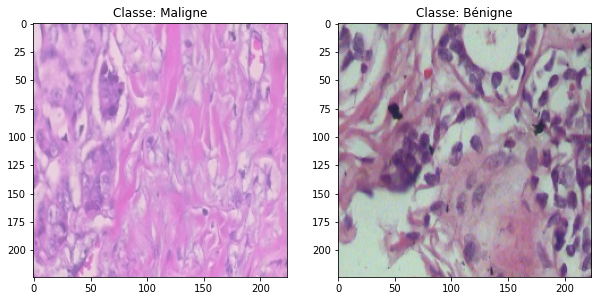

In [ ]:
plot_batch(X_train,Y_train,columns = 2,rows = 1)

## Architecture

In [ ]:
def architecture():
  model = Sequential([
    Input(shape=(224, 224, 3)),
    layers.Conv2D(filters = 32,kernel_size = (3,3),activation='relu',strides=(1,1),padding="valid"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(filters = 32,kernel_size =(3,3),activation='relu',strides=(1,1),padding="valid"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(filters = 64,kernel_size =(3,3),activation='relu',strides=(1,1),padding="valid"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(filters = 64,kernel_size =(3,3),activation='relu',strides=(1,1),padding="valid"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(filters = 128,kernel_size =(3,3),activation='relu',strides=(1,1),padding="valid"),
    layers.MaxPooling2D(pool_size = (2,2)),
    #----------------------------------------------------------------------------------------------
    layers.Flatten(),
    layers.Dense(units = 512,activation='relu'),
    layers.Dense(units = 64,activation='relu'),
    layers.Dense(units = 1,activation='sigmoid')
  ])
  model.compile(
        loss='binary_crossentropy',#Erreur à minimiser 
        optimizer=SGD(learning_rate = 0.001,momentum = 0.9),
        metrics=['accuracy'] #Pourcentage des bien classés
    )   
  return model

In [ ]:
model = architecture()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

## Entrainement

In [ ]:
history = model.fit(
    X_train,Y_train,
    batch_size = 128,
    epochs = 400,
    validation_data = (X_test,Y_test),
    shuffle = True,
    verbose = 1  
)

Epoch 1/400
50/50 [==============================] - 8s 163ms/step - loss: 0.6508 - accuracy: 0.6864 - val_loss: 0.6158 - val_accuracy: 0.6865
Epoch 2/400
50/50 [==============================] - 7s 149ms/step - loss: 0.6152 - accuracy: 0.6864 - val_loss: 0.6106 - val_accuracy: 0.6865
Epoch 3/400
50/50 [==============================] - 8s 150ms/step - loss: 0.6100 - accuracy: 0.6864 - val_loss: 0.6046 - val_accuracy: 0.6865
Epoch 4/400
50/50 [==============================] - 7s 149ms/step - loss: 0.6021 - accuracy: 0.6864 - val_loss: 0.5911 - val_accuracy: 0.6865
Epoch 5/400
50/50 [==============================] - 8s 150ms/step - loss: 0.5855 - accuracy: 0.6864 - val_loss: 0.5657 - val_accuracy: 0.6865
Epoch 6/400
50/50 [==============================] - 8s 150ms/step - loss: 0.5567 - accuracy: 0.6864 - val_loss: 0.5271 - val_accuracy: 0.6865
Epoch 7/400
50/50 [==============================] - 8s 153ms/step - loss: 0.5230 - accuracy: 0.6880 - val_loss: 0.4923 - val_accuracy: 0.7225

## Visualisation des Résultats

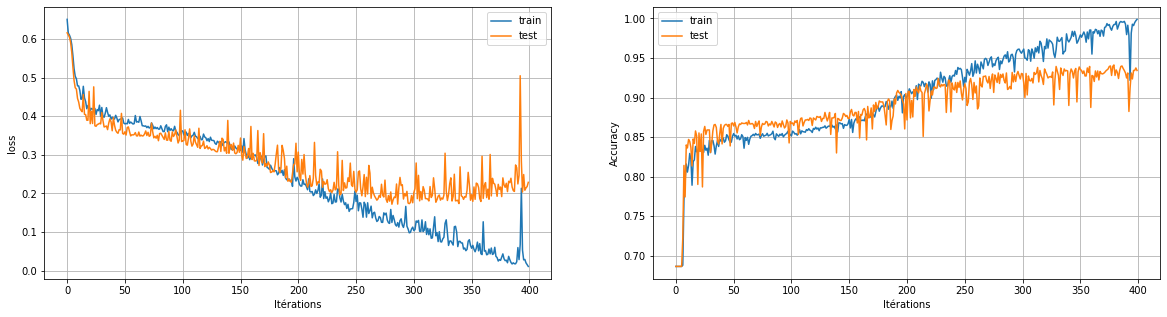

In [ ]:
acc,loss = history.history["accuracy"],history.history["loss"]
val_acc,val_loss = history.history["val_accuracy"],history.history["val_loss"]
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(range(400),loss,label = 'train')
plt.plot(range(400),val_loss,label = 'test')
plt.legend()
plt.xlabel('Itérations')
plt.ylabel('loss')
plt.grid()
plt.subplot(1,2,2)
plt.plot(range(400),acc , label = 'train')
plt.plot(range(400),val_acc , label = 'test')
plt.legend()
plt.xlabel('Itérations')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
pred = model.evaluate(X_test,Y_test)
print(f'Score de la base de test : {pred[1]*100} %')

50/50 [==============================] - 1s 17ms/step - loss: 0.2286 - accuracy: 0.9343
Score de la base de test : 93.42604279518127 %


##Application


In [ ]:
from google.colab import files
uploaded = files.upload()
# Prédiction des images
for i in uploaded.keys():
  path = '/content/' + i
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x = x / 255.0
  x = np.expand_dims(x, axis=0)
  classe = model.predict(x)
  if classe[0]>0.5:
    print("Résultat: Maligne")
    plt.imshow(img)
  else:
    print("Résultat: Bénigne")
    plt.imshow(img)
  

##Fin du Programme